In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [19]:
df = pd.read_csv('kc_house_data_train.csv', index_col = 0)
pd.set_option('display.max_columns', None) # display all columns
df.drop(columns = ['date','id'], inplace = True) # not relevant to our purposes
df['price_log'] = np.log10(df['price'])

In [4]:
gpd_df = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.long, df.lat))
kings_county = gpd.read_file('School_Districts_in_King_County___schdst_area.shp')          
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

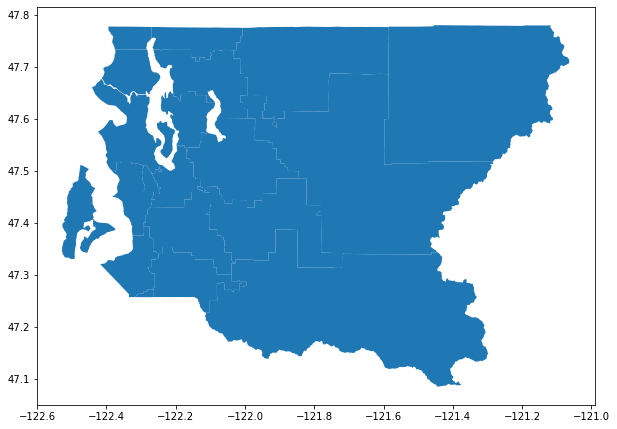

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(figsize = (10,8))
kings_county.plot(ax=ax, aspect = 1.5)
fig = plt.figure()
# ratio = 0.8
# ax.set_aspect(1.0/ax.get_data_ratio()*ratio)

In [7]:
crs = {'init': 'epsg:4326'} # initiating coordinate system
geometry = [Point(x,y) 
           for x,y in zip(df.long,df.lat)] # creating ordered pairs (points) for houses
geo_df = gpd.GeoDataFrame(df,
                          crs = crs,
                          geometry = geometry)

/Users/wax/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


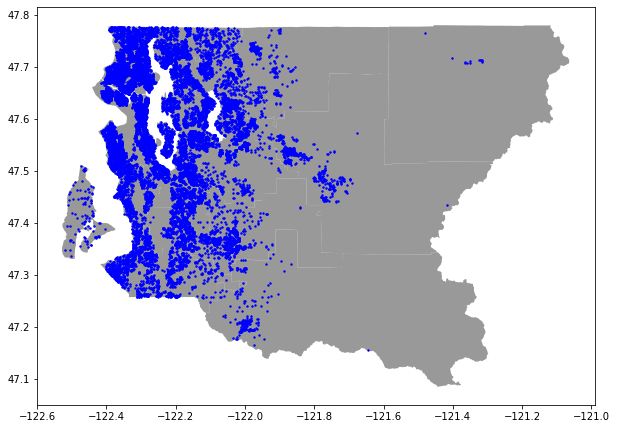

In [8]:
fig, ax = plt.subplots(figsize = (10,8))
kings_county.plot(ax=ax, alpha = 0.8, color = 'grey')
# kings_county.to_crs(epsg = 4326).plot(ax=ax, color = 'lightgrey')
geo_df.plot(ax = ax, markersize = 2, color = 'blue',
            marker = 'o', label = 'Houses', aspect = 1.5)
# ratio = 0.8
# ax.set_aspect(1.0/ax.get_data_ratio()*ratio)
# geo_df['price_log'] = np.log(geo_df['price'])

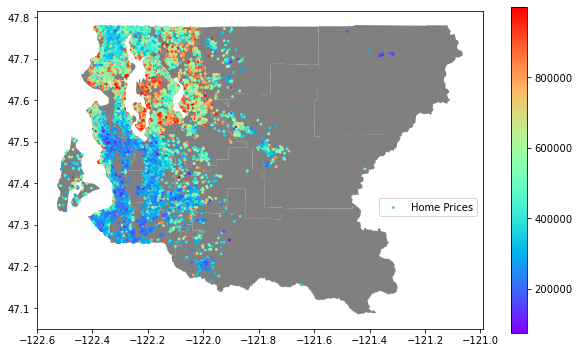

In [34]:
lower_prices_df = geo_df[geo_df['price'] < 1000000]
fig, ax = plt.subplots(figsize = [10,6])
kings_county.plot(ax=ax, alpha = 1, color = 'grey')
lower_prices_df.plot(column = 'price', ax=ax, markersize = 3,
                  cmap = 'rainbow', legend = True, aspect = 1.5, label = 'Home Prices')
fig.legend(bbox_to_anchor = (0.67, 0.37))

/Users/wax/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


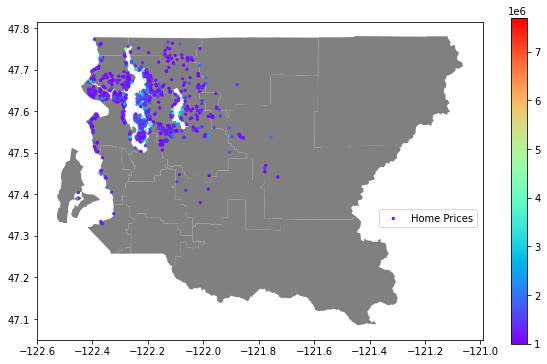

In [37]:
higher_prices_df = geo_df[geo_df['price'] >= 1000000]
higher_prices_df['price_log'] = np.log10(higher_prices_df.price)
fig, ax = plt.subplots(figsize = [10,6])
kings_county.plot(ax=ax, alpha = 1, color = 'grey')
higher_prices_df.plot(column = 'price', ax=ax, markersize = 5,
                   cmap = 'rainbow', legend = True, aspect = 1.5, label = 'Home Prices')
fig.legend(bbox_to_anchor = (0.67, 0.37))

In [23]:
print(stats.shapiro(df.price))
print(stats.shapiro(df.price_log))

ShapiroResult(statistic=0.6975250244140625, pvalue=0.0)
ShapiroResult(statistic=0.9883251190185547, pvalue=5.191755619342651e-35)


/Users/wax/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


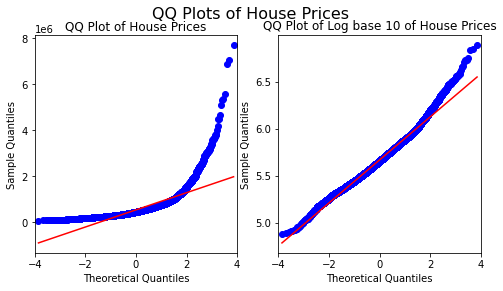

In [24]:
fig, ax = plt.subplots(1, 2, figsize = [8,4])
sm.qqplot(df.price,line='s', ax=ax[0])
sm.qqplot(df.price_log,line='s', ax=ax[1])
ax[0].set_title('QQ Plot of House Prices')
ax[1].set_title('QQ Plot of Log base 10 of House Prices')
fig.suptitle('QQ Plots of House Prices', fontsize=16)
plt.show()

<ipython-input-22-e25e833f00ba>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mid50 = df[df.price <= df.price.median() + 1.5*IQR][df.price >= df.price.median() - 1.5*IQR]


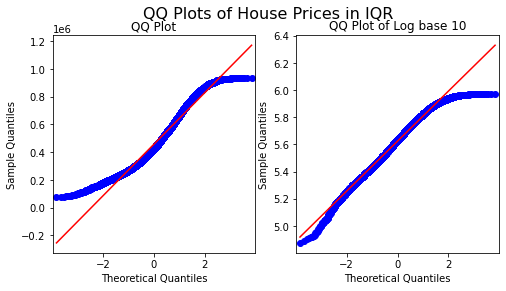

In [22]:
mid_year = ( df.yr_built.max()-df.yr_built.min() ) / 2 + df.yr_built.min()
IQR = stats.iqr(df.price, interpolation = 'midpoint')
df_mid50 = df[df.price <= df.price.median() + 1.5*IQR][df.price >= df.price.median() - 1.5*IQR]
fig, ax = plt.subplots(1, 2, figsize = [8,4])
sm.qqplot(df_mid50.price,line='s', ax=ax[0])
sm.qqplot(df_mid50.price_log,line='s', ax=ax[1])
ax[0].set_title('QQ Plot')
ax[1].set_title('QQ Plot of Log base 10')
fig.suptitle('QQ Plots of House Prices in IQR', fontsize=16)
plt.show()

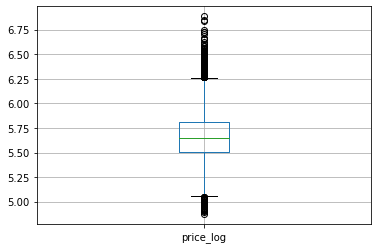

In [38]:
df.boxplot(['price_log'])

In [ ]:
# standardize scale for display
# x sample size
# subtract sample mean divided by sample std. dev
def standardize_scale(x):
    return (x - np.mean(x))/(np.std(x))

In [39]:
pred_columns = [str(i) for i in predictors.columns]
outcome = 'price'
full_df = pd.concat([df_train, df.price], axis = 1)
predictors = df_train
pred_sum = '+'.join(pred_columns)
formula = outcome + '~' + pred_sum
model = sm.OLS(formula=formula, data=full_df).fit()
model.summary()

NameError: name 'predictors' is not defined

In [ ]:
# should not use Statsmodels
train_target = df.price
train_target_log = df.price_log # better r^2, worse RMSE
preds = sm.add_constant(df_train)
preds_log = sm.add_constant(df_train)
model = sm.OLS(train_target, preds).fit()
model_log = sm.OLS(train_target_log, preds_log).fit()
# model.summary();

print(model.rsquared)
print(model_log.rsquared)

pred_prices = model.predict()
pred_prices_log = model_log.predict()
# mae = mean_absolute_error(train_target, pred_prices)
mse = mean_squared_error(train_target, pred_prices)
rmse = np.sqrt(mse)
r2 = r2_score(train_target,pred_prices)

mse_10 = mean_squared_error(10**train_target_log, 10**pred_prices_log)
rmse_10 = np.sqrt(mse_10)
r2_10 = r2_score(train_target_log,pred_prices_log)

print(rmse)
print(rmse_10)
print(r2)
print(r2_10)


#     print(r2)
#     print(lm.score(df_train, train_target))
#     print(rmse)
    
#     print(r2)
#     print(lm_log.score(df_train, train_target_log))
#     print(log_rmse)

In [ ]:
df_subset = df['features']
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_subset)
poly2_columns = poly_2.get_feature_names(df_subset.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

In [ ]:
heat map with correlation to price - done
zip code vs price - done
suburbs, city, rural - geofencing - nah
(year - mid_year)^2 - done 
years since renovation not important - okay
do p test - 
popularity of houses - nah
peak months - done
cost per sq ft - nah
anova
p values

residuals = df_target.price - price_pred
fig, ax = plt.subplots(3, 1, figsize = [12,12])
sns.residplot(data = [price_pred, df_target.price], x = price_pred, y = df_target.price,
              lowess=True, color='g', ax = ax[0])
sns.distplot(residuals, kde=True, rug=True, ax=ax[1])
sm.qqplot(residuals,line='s', ax=ax[2])
plt.show()

print (stats.shapiro(residuals))

residuals = df_target.price - 10**price_pred_log
fig, ax = plt.subplots(3, 1, figsize = [12,12])
# pred_10 = 10**price_pred_log
sns.residplot(data = [price_pred_log, df_target.price], x = price_pred_log, y = df_target.price,
              lowess=True, color='g', ax=ax[0])
sns.distplot(residuals, kde=True, rug=True, ax=ax[1])
sm.qqplot(residuals,line='s', ax=ax[2])
plt.show()

In [ ]:
#     y_log = np.log10(y_train)
#     lm_log = LinearRegression()
#     lm_log = lm_log.fit(X_train, y_log)
#     log_train_pred  = lm_log.predict(X_train)
#     y_train_pred = 10**log_train_pred
#     train_mse = mean_squared_error(y_train, y_train_pred)
#     train_rmse = np.sqrt(train_mse)
    
#     log_test_pred = lm_log.predict(X_test)
#     y_test_pred = 10**(log_test_pred)
    
#     #evaluate the predictions on the test examples
#     test_mse = mean_squared_error(y_test, y_test_pred)
#     test_rmse = np.sqrt(test_mse)
    
#     return {'train_rmse': train_rmse, 'test_rmse' : test_rmse}